<a href="https://colab.research.google.com/github/gojeonpa2se/DS1002-S24-1/blob/main/Assignments/06_Pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [52]:
import pandas as pd

---

In [ ]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [6]:
list = [98, 24, 46, 87, 33]
ser = pd.Series(list)
print(ser)

0    98
1    24
2    46
3    87
4    33
dtype: int64


3. Take the above series and add an index that starts at 2 and steps by 3

In [17]:
ser.index = range(2, len(ser) * 3 + 2, 3)
print(ser)

2     98
5     24
8     46
11    87
14    33
dtype: int64


4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [19]:
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie', 'David'], 'Age': [25, 30, 35, 40],'Career': ['Engineer', 'Teacher', 'Doctor', 'Artist']})
print(df)

      Name  Age    Career
0    Alice   25  Engineer
1      Bob   30   Teacher
2  Charlie   35    Doctor
3    David   40    Artist


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [20]:
df.index.name = 'participant_id'
print(df)

                   Name  Age    Career
participant_id                        
0                 Alice   25  Engineer
1                   Bob   30   Teacher
2               Charlie   35    Doctor
3                 David   40    Artist


6. Use a pandas function to determine the data types of the columns of `df`.

In [38]:
data_types = df.dtypes

7. Using bracket notation, reference column `name`

In [39]:
column_bracket = df['Name']


8. Using dot notation, reference column `name`

In [40]:
column_dot = df.Name

8. Reference column `name` and have it returned in a dataframe.

In [41]:
column_df = df[['Name']]

9. Show the 3rd element in column `career`.

In [46]:
third_career = df.loc[2]['Career']
print("The 3rd element in column 'Career' is", third_career)

The 3rd element in column 'Career' is Doctor


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [53]:
import seaborn as sns
iris = sns.load_dataset('iris')

11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [54]:
iris[['sepal_length','sepal_width']].corr()

,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [64]:
iris.species.value_counts()


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [67]:
grouped_species = iris.groupby('species')
correlations = grouped_species[['sepal_length', 'sepal_width']].corr()
print(correlations.loc['virginica'])
print(correlations.loc['versicolor'])
print(correlations.loc['setosa'])

              sepal_length  sepal_width
sepal_length      1.000000     0.457228
sepal_width       0.457228     1.000000
              sepal_length  sepal_width
sepal_length      1.000000     0.525911
sepal_width       0.525911     1.000000
              sepal_length  sepal_width
sepal_length      1.000000     0.742547
sepal_width       0.742547     1.000000


Setosa has the highest correlation between sepal_length and sepal_width with a value of 0.742547

13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [83]:
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
#by calculating the overall correlation at once, we know that the most negatively correlated are sepal_width and petal_length.

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [85]:
grouped_species[['sepal_length', 'sepal_width','petal_length', 'petal_width']].corr()

sepal_length  sepal_width  petal_length  petal_width
species                                                                      
setosa     sepal_length      1.000000     0.742547      0.267176     0.278098
           sepal_width       0.742547     1.000000      0.177700     0.232752
           petal_length      0.267176     0.177700      1.000000     0.331630
           petal_width       0.278098     0.232752      0.331630     1.000000
versicolor sepal_length      1.000000     0.525911      0.754049     0.546461
           sepal_width       0.525911     1.000000      0.560522     0.663999
           petal_length      0.754049     0.560522      1.000000     0.786668
           petal_width       0.546461     0.663999      0.786668     1.000000
virginica  sepal_length      1.000000     0.457228      0.864225     0.281108
           sepal_width       0.457228     1.000000      0.401045     0.537728
           petal_length      0.864225     0.401045      1.000000     0.322108
           petal_width       0.281108     0.537728      0.322108     1.000000

For the species 'setosa,' sepal_width and petal_length has the least positive correlation.
For the species 'versicolor,' sepal_length and sepal_width has the least positive correlation.
For the species 'virginica,' sepal_length and petal_width has the least positive correlation.

14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


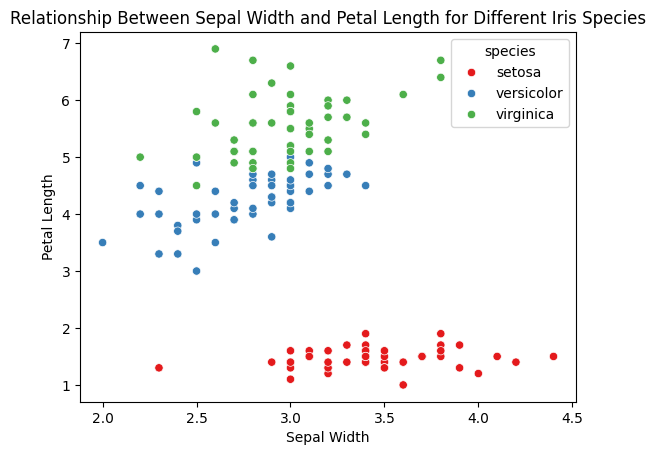

In [88]:
import matplotlib.pyplot as plt

sns.scatterplot(data=iris, x='sepal_width', y='petal_length', hue='species', palette='Set1')

plt.title('Relationship Between Sepal Width and Petal Length for Different Iris Species')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')

plt.show()


The scatter plot suggests that as sepal_width increases, petal_length also tends to increase. The vice versa also applies, and this contradicts the negative correlation observed across all species. It is important to consider the specific characteristics of each species. It might be because each species are influenced by other variables or factors specific to them. I'm not very sure, but it might be called the simpson's paradox, I guess.